<a href="https://colab.research.google.com/github/fernandoescobosa/data_science/blob/main/Analisando_a_Viol%C3%AAncia_no_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisando a Violência no Rio de Janeiro

Neste projeto vamos analisar dados de casos, vítimas e ocorrências de violência no estado do Rio de Janeiro. Temos acesso ao número de registros de ocorrências dos últimos 30 anos separados por tipos de crimes, e com isso podemos estabelecer alguns objetivos que listaremos a seguir:

1. Verificar a quantidade de casos e registros de determinados crimes ao longo dos anos. Neste caso estaremos interessados em analisar:
  * homicídios dolosos e tentativas de homicídios;
  * roubos, furtos e recuperação de veículos;
  * apreensão de drogas.

2. Comparar o número de casos mensais de 2020 com as médias mensais dos últimos anos de:
  * letalidade violenta, incluindo homicídio doloso, lesão corporal seguida de morte, latrocínio e morte por intervenção de agente do Estado;
  * roubos de rua, roubos de veículos e roubos à residências.

3. Praticar a análise e manipulação de dados utilizando a biblioteca Pandas em Python.

Vale ressaltar a importância do segundo objetivo devido a pandemia que se iniciou no Brasil em 2020, no qual o isolamento e o fechamento do comércio, em particular, podem ser fatores que contribuíram com a diminuição de casos.

## Obtenção dos Dados

Os dados que serão utilizados neste projeto podem ser encontrador no portal [ISPDados](http://www.ispdados.rj.gov.br/estatistica.html#), a página de dados abertos do Instituto de Segurança Pública do governo do Rio de Janeiro. Mais precisamente, faremos uso dos dados contendo a série histórica mensal no estado desde janeiro de 1991.

De acordo com o Instituto, as estatísticas encontradas em seu portal de dados são produzidas a partir de Registros de Ocorrencia, baseando-se nas datas em que foram criados. Além disso, estes registros "são submetidos ao controle de qualidade realizado pela Corregedoria Geral de Polícia (CGPOL) da Secretaria de Estado de Polícia Civil", e portanto podemos esperar encontrar dados corretos.

O ISP tem como objetivo, além de consolidar e divulgar estes dados, trazer informações, análises e pesquisas com relação à segurança pública.


### Importando os dados

Vamos iniciar importando as bibliotecas que serão utilizadas neste projeto

In [1]:
# bibliotecas utilizadas neste projeto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

%matplotlib inline

Os dados estão em formato *csv*, porém foi utilizado *ponto e vírgula* como separador e dados ausentes foram completados com *espaços em branco*.

Resolvemos estes problemas modificando o separador ao fazer a leitura dos dados e utilizando expressões regulares para substituir espaços por NaN, como pode ser verificado abaixo.


In [2]:
# importanto os dados
df = pd.read_csv('http://www.ispdados.rj.gov.br/Arquivos/DOMensalEstadoDesde1991.csv', sep=';')

In [3]:
# substituindo valores apenas com espaços em branco por NaN
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

# verificando as 5 primeiras entradas do dataset
df.head()

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_transeunte,roubo_celular,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,NaN,672,162,3051,NaN,NaN,NaN,967,NaN,381,1348,1174,63,350,188,37,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,NaN,3
1,1991,2,732,NaN,17,NaN,NaN,749,175,3421,NaN,NaN,NaN,963,NaN,432,1395,1097,64,357,171,35,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,NaN,3
2,1991,3,713,NaN,25,NaN,NaN,738,216,3613,NaN,NaN,NaN,963,NaN,422,1385,1265,71,443,191,43,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,NaN,3
3,1991,4,634,NaN,20,NaN,NaN,654,200,3211,NaN,NaN,NaN,1186,NaN,354,1540,1415,81,425,199,36,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,NaN,3
4,1991,5,650,NaN,20,NaN,NaN,670,146,3051,NaN,NaN,NaN,931,NaN,335,1266,1449,82,553,231,27,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,NaN,3


## Análise Inicial dos Dados

Antes de iniciar o processo de análise exploratória, precisamos conhecer os dados. Como podemos verificar, este conjunto de dados possui 361 entradas, sendo cada uma delas referentes à um mês entre janeiro de 1991 e janeiro de 2021, e 56 variáveis.




In [4]:
#Verificar o tamanho do DataFrame
entradas = df.shape[0]
variaveis = df.shape[1]

print(f'Entradas: {entradas}')
print(f'Variáveis: {variaveis}')

Entradas: 362
Variáveis: 56


In [5]:
print(f'Este conjunto de dados possui informações de {df.mes[0]}/{df.ano[0]} à {df.mes[entradas-1]}/{df.ano[entradas-1]}')

Este conjunto de dados possui informações de 1/1991 à 2/2021


In [6]:
# Verificando as variáveis do DataFrame
df.columns

Index(['ano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio', 'cvli',
       'hom_por_interv_policial', 'letalidade_violenta', 'tentat_hom',
       'lesao_corp_dolosa', 'estupro', 'hom_culposo', 'lesao_corp_culposa',
       'roubo_transeunte', 'roubo_celular', 'roubo_em_coletivo', 'roubo_rua',
       'roubo_veiculo', 'roubo_carga', 'roubo_comercio', 'roubo_residencia',
       'roubo_banco', 'roubo_cx_eletronico', 'roubo_conducao_saque',
       'roubo_apos_saque', 'roubo_bicicleta', 'outros_roubos', 'total_roubos',
       'furto_veiculos', 'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_

No site do [ISP](http://www.ispdados.rj.gov.br/Notas.html) também é possível encontrar um dicionário, em formato xls, para as variáveis. Após formatá-lo e transformá-lo para csv, disponibilizei o arquivo no github.

In [7]:
# importando os dados do dicionário disponibilizado no github
dicionario = pd.read_csv('https://raw.githubusercontent.com/fernandoescobosa/data_science/main/projeto_violencia_rj/DicionarioVariaveis.csv', index_col=0)
dicionario.head()

,Descrição,Contagem,Observação,Disponibilidade,Grupo
Variável,,,,,
ano,Auto de Apreensão de Adolescente por Prática d...,NaN,NaN,NaN,DATA
mes,Mês da comunicação da ocorrência,NaN,NaN,NaN,DATA
fase,2 - Consolidado sem errata 3 - Consolidado ...,NaN,NaN,NaN,DATA
hom_doloso,Homicídio doloso,vítima,NaN,A partir de 1991,CRIMES VIOLENTOS
lesao_corp_morte,Lesão corporal seguida de morte,vítima,NaN,A partir de 1999,CRIMES VIOLENTOS


Desta forma podemos saber facilmente, por exemplo, a descrição da váriável *cvli*:

In [8]:
# Utilizando o dicionário para verificar uma descrição
dicionario.loc['cvli']['Descrição']

'Crimes violentos letais intencionais'

Ao verificar os tipos de variáveis do dataframe, vemos que existem algumas de tipo *int* e outras *object*. Todas deveriam ser do tipo *int*, pois são com relação a contagem de vítimas ou casos. Como vemos a seguir isto ocorre devido à existência de valores ausentes. 

In [9]:
# Verificando os tipos das variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ano                         362 non-null    int64 
 1   mes                         362 non-null    int64 
 2   hom_doloso                  362 non-null    int64 
 3   lesao_corp_morte            266 non-null    object
 4   latrocinio                  362 non-null    int64 
 5   cvli                        266 non-null    object
 6   hom_por_interv_policial     278 non-null    object
 7   letalidade_violenta         362 non-null    int64 
 8   tentat_hom                  362 non-null    int64 
 9   lesao_corp_dolosa           362 non-null    int64 
 10  estupro                     218 non-null    object
 11  hom_culposo                 278 non-null    object
 12  lesao_corp_culposa          266 non-null    object
 13  roubo_transeunte            362 non-null    int64 

In [10]:
# Porcentagem dos valores ausentes
df.isnull().sum()/entradas

ano                           0.000000
mes                           0.000000
hom_doloso                    0.000000
lesao_corp_morte              0.265193
latrocinio                    0.000000
cvli                          0.265193
hom_por_interv_policial       0.232044
letalidade_violenta           0.000000
tentat_hom                    0.000000
lesao_corp_dolosa             0.000000
estupro                       0.397790
hom_culposo                   0.232044
lesao_corp_culposa            0.265193
roubo_transeunte              0.000000
roubo_celular                 0.298343
roubo_em_coletivo             0.000000
roubo_rua                     0.000000
roubo_veiculo                 0.000000
roubo_carga                   0.000000
roubo_comercio                0.000000
roubo_residencia              0.000000
roubo_banco                   0.000000
roubo_cx_eletronico           0.397790
roubo_conducao_saque          0.397790
roubo_apos_saque              0.397790
roubo_bicicleta          

Observe que existem variáveis, como *roubo_bicicleta*, que possuem muitos valores ausentes. Neste caso, são mais de 76%! Para entender o motivo, podemos olhar a disponibilidade destes dados:

In [11]:
dicionario.loc['roubo_bicicleta']['Disponibilidade']

'A partir de 2015'

Portanto faltam dados de 1991 até 2014. Outros exemplos são *extorsao*, *sequestro_relampago* e *estelionato*, que possuem dados a partir de 2003. Estas, juntamente com *sequestro*, formam o grupo *outros crimes contra o patrimônio*, como pode ser visto abaixo.

In [12]:
dicionario[dicionario['Grupo'] == dicionario.loc['extorsao']['Grupo']][['Descrição', 'Disponibilidade', 'Grupo']]

,Descrição,Disponibilidade,Grupo
Variável,,,
sequestro,Extorsão mediante sequestro (sequestro clássico),A partir de 1999,OUTROS CRIMES CONTRA O PATRIMÔNIO
extorsao,Extorsão,A partir de 2003,OUTROS CRIMES CONTRA O PATRIMÔNIO
sequestro_relampago,Extorsão com momentânea privação da liberdade ...,A partir de 2003,OUTROS CRIMES CONTRA O PATRIMÔNIO
estelionato,Estelionato,A partir de 2003,OUTROS CRIMES CONTRA O PATRIMÔNIO


Ao verificar os possíveis valores encontrados em *Disponibilidade* no dicionário de variáveis, notamos que apesar de termos dados disponíveis desde 1991, existem categorias que foram adicionadas apenas em 2015. Isto significa que se quisermos estudar todas as variáveis do dataset precisamos considerar apenas os dados a partir desta data ou verificar caso a caso.

In [13]:
# Anos em que foram acrescentadas variáveis
dicionario.Disponibilidade.unique()

array([nan, 'A partir de 1991', 'A partir de 1999', 'A partir de 1998',
       'A partir de 2003', 'A partir de 2000', 'A partir de 2015',
       'A partir de 2006', 'A partir de 2002'], dtype=object)

Além disso, os dados estão separados por grupos e assim podemos verificar quantos grupos existem e quais são eles:

In [14]:
# grupos de divisão do dataset
grupos = dicionario.Grupo.unique()
print(f'Número de grupos: {len(grupos)}')
for grupo in grupos:
  print(grupo)

Número de grupos: 9
DATA
CRIMES VIOLENTOS
CRIMES DE TRÂNSITO
ROUBOS
FURTOS
OUTROS CRIMES CONTRA O PATRIMÔNIO
ATIVIDADE POLICIAL
OUTROS REGISTROS
REGISTROS DE OCORRÊNCIAS


## Tratamento dos dados

Primeiramente mudaremos o índice do dataframe para a data de ocorrência, que será do tipo `datetime`, na qual agregaremos as informações de `ano` e `mes`, utilizando o dia primeiro de cada mês apenas como referência. Fazendo isto podemos excluir as variáveis `ano` e `mes`.

In [15]:
# Alterar o índice do dataframe para o formato de datas
datas = {'year': list(df.ano), 'month': list(df.mes), 'day': list(np.ones(entradas))}
df.index = pd.to_datetime(datas, format='%Y%m%d')

# excluir as colunas de mes e ano, pois estas informações já se encontram no índice
df.drop(['ano', 'mes'], axis=1, inplace=True)
df.drop(df[df.index.year == 2021].index,
        axis=0,
        inplace=True)

 Agora criaremos 3 dataframes que utilizaremos ao longo da análise:

* `df_1991` que contém apenas as variáveis que possuem informações desde 1991;
* `df_2015` que contém dados de todas as váriáveis a partir dos anos de 2015 à 2019;
* `df_2020`, que contém apenas informações do ano de 2020.

Para a primeira, basta excluir todas as colunas que possuem algum valor ausente. Já para a segunda, excluiremos todas as entradas prévias ao ano de 2015.

In [16]:
# Cria um novo dataframe df_1991 excluindo as colunas com valores ausentes
df_1991 = df.copy()

df_1991 = df_1991.dropna(axis='columns')

In [17]:
df_1991.head()

,hom_doloso,latrocinio,letalidade_violenta,tentat_hom,lesao_corp_dolosa,roubo_transeunte,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,outros_furtos,total_furtos,apreensao_drogas,recuperacao_veiculos,encontro_cadaver,fase
1991-01-01,657,15,672,162,3051,967,381,1348,1174,63,350,188,37,158,3318,2009,1147,3561,6717,133,872,217,3
1991-02-01,732,17,749,175,3421,963,432,1395,1097,64,357,171,35,142,3261,1850,1066,3309,6225,127,751,209,3
1991-03-01,713,25,738,216,3613,963,422,1385,1265,71,443,191,43,131,3529,2084,1062,3573,6719,80,789,188,3
1991-04-01,634,20,654,200,3211,1186,354,1540,1415,81,425,199,36,112,3808,2085,1195,3290,6570,133,787,140,3
1991-05-01,650,20,670,146,3051,931,335,1266,1449,82,553,231,27,147,3755,2185,723,3546,6454,163,845,78,3


In [18]:
# Cria um novo dataframe df_2015 que contém todas as variáveis, mas apenas para valores entre 2015 e 2019
df_2015 = df.copy()

df_2015.drop(df_2015[df_2015.index.year < 2015].index,
                       axis=0,
                       inplace=True)
df_2015.drop(df_2015[df_2015.index.year > 2019].index,
             axis=0,
             inplace=True)
df_2015 = df_2015.astype(int)


df_2015.head()

,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_transeunte,roubo_celular,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
2015-01-01,439,1,11,451,65,516,618,7747,485,166,3522,6928,915,702,8545,2874,735,666,105,2,4,3,110,0,1323,14367,1593,3396,832,1451,0,9082,16354,1,143,9,3171,2492,1101,1198,232,2328,2905,934,1496,58,7272,577,54,2,3,0,71617,3
2015-02-01,326,8,10,344,83,427,479,6757,346,134,2966,6421,906,499,7826,2494,507,562,78,3,4,10,136,0,1253,12873,1334,4975,776,1854,0,8365,17304,0,124,14,2378,2334,1048,1078,246,1969,2809,903,1431,57,6135,500,43,2,1,0,65058,3
2015-03-01,382,1,15,398,54,452,545,6795,439,144,3600,6145,904,586,7635,2861,548,609,106,2,3,13,165,0,1277,13219,1521,3368,988,1534,0,8311,15722,0,186,17,3266,2514,1068,1249,240,2310,3425,1010,1759,87,7088,593,55,13,3,0,69267,3
2015-04-01,339,4,21,364,59,423,490,6293,420,142,3358,5551,890,636,7077,2690,481,526,87,5,5,12,124,0,1140,12147,1321,2991,929,1383,0,7520,14144,1,154,13,2657,2252,894,1159,250,1968,3083,931,1958,57,6259,504,38,1,2,0,63077,3
2015-05-01,347,2,8,357,44,401,482,5844,354,159,3322,5416,916,643,6975,2451,559,525,83,3,1,5,147,0,1216,11965,1432,3256,951,1436,0,7759,14834,1,206,7,3019,2256,917,1177,206,2031,3094,806,1878,57,5992,520,44,4,4,1,64230,3


In [19]:
# Cria um novo dataframe df_2020 que contem apenas os dados de 2020
df_2020 = df.copy()

df_2020.drop(df_2020[df_2020.index.year < 2020].index, 
             axis=0,
             inplace=True)

df_2020 = df_2020.astype(int)


df_2020

,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_transeunte,roubo_celular,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
2020-01-01,358,4,8,370,156,526,448,5369,398,145,1936,6194,2188,1181,9563,3246,577,414,74,1,5,6,99,29,1852,15866,1365,2118,582,1744,278,8562,14649,0,98,9,3950,1720,734,877,140,2128,2857,482,1335,265,4942,400,36,1,2,0,65718,3
2020-02-01,326,2,10,338,164,502,421,5408,420,153,1890,5692,2065,1298,9055,2925,418,382,61,2,7,4,81,12,1555,14502,1182,2133,568,2270,231,7328,13712,0,103,10,3547,1738,776,877,111,1788,2883,431,1190,243,4643,378,39,2,1,0,62850,3
2020-03-01,374,2,9,385,115,500,361,4069,367,130,1248,4400,1541,984,6925,2449,365,308,71,0,7,5,93,18,1720,11961,1114,1210,394,1139,180,6752,10789,0,99,16,3086,1469,558,814,128,1526,2543,385,914,180,3243,272,16,0,2,0,49816,3
2020-04-01,312,5,5,322,179,501,324,2722,241,133,584,2533,984,489,4006,1846,337,169,56,2,4,1,53,13,1406,7893,922,283,105,305,106,4001,5722,0,95,9,2594,1436,428,918,123,1114,2452,410,544,2,2216,178,26,3,1,0,32814,3
2020-05-01,273,0,6,279,130,409,291,2429,261,130,684,2451,942,420,3813,1586,455,169,46,2,8,2,44,5,1185,7315,904,255,108,356,84,4266,5973,0,85,7,3572,1581,535,935,140,991,2169,314,687,6,2301,181,16,4,0,1,35003,3
2020-06-01,259,2,2,263,34,297,307,3156,394,143,882,2849,951,580,4380,1743,404,199,38,0,5,8,49,15,1079,7920,954,331,172,371,80,4797,6705,0,93,12,5210,1502,592,818,131,1060,2145,308,763,8,2827,210,20,1,3,0,41912,3
2020-07-01,257,4,7,268,52,320,377,3934,382,165,1526,3848,1345,846,6039,1817,544,228,77,0,6,16,72,13,1362,10174,1061,582,257,630,103,5852,8485,0,133,13,6058,1844,822,895,160,1207,2612,345,1331,12,3660,238,18,3,1,0,51242,3
2020-08-01,261,2,12,275,51,326,354,4213,459,162,1702,3481,1252,659,5392,1791,415,243,42,2,5,4,74,15,1190,9173,1107,702,343,746,129,5755,8782,0,118,3,4592,2050,1009,917,172,1283,2915,343,1512,35,4102,275,29,4,0,2,50348,3
2020-09-01,239,3,7,249,54,303,343,4560,481,171,1675,3567,1319,582,5468,1742,323,294,61,0,4,2,57,27,1146,9124,1065,698,379,823,132,5888,8985,1,105,5,4086,1984,974,890,150,1173,2497,455,1059,37,4094,297,22,1,0,0,48732,3
2020-10-01,277,2,5,284,145,429,404,4601,452,175,1834,3971,1277,768,6016,1898,357,290,49,0,0,6,52,15,1240,9923,1058,813,431,1005,157,5866,9330,0,105,11,4593,2019,972,910,173,1212,2787,369,993,37,4194,297,24,4,2,0,50772,3


Como podemos ver a seguir, os dataframes `df_2015` e `df_2020` não possui valores ausentes. Além disso, convertemos os tipos `object` para `int`.

In [20]:
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2015-01-01 to 2019-12-01
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   hom_doloso                  60 non-null     int64
 1   lesao_corp_morte            60 non-null     int64
 2   latrocinio                  60 non-null     int64
 3   cvli                        60 non-null     int64
 4   hom_por_interv_policial     60 non-null     int64
 5   letalidade_violenta         60 non-null     int64
 6   tentat_hom                  60 non-null     int64
 7   lesao_corp_dolosa           60 non-null     int64
 8   estupro                     60 non-null     int64
 9   hom_culposo                 60 non-null     int64
 10  lesao_corp_culposa          60 non-null     int64
 11  roubo_transeunte            60 non-null     int64
 12  roubo_celular               60 non-null     int64
 13  roubo_em_coletivo           60 non-null     int

In [21]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 2020-01-01 to 2020-12-01
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   hom_doloso                  12 non-null     int64
 1   lesao_corp_morte            12 non-null     int64
 2   latrocinio                  12 non-null     int64
 3   cvli                        12 non-null     int64
 4   hom_por_interv_policial     12 non-null     int64
 5   letalidade_violenta         12 non-null     int64
 6   tentat_hom                  12 non-null     int64
 7   lesao_corp_dolosa           12 non-null     int64
 8   estupro                     12 non-null     int64
 9   hom_culposo                 12 non-null     int64
 10  lesao_corp_culposa          12 non-null     int64
 11  roubo_transeunte            12 non-null     int64
 12  roubo_celular               12 non-null     int64
 13  roubo_em_coletivo           12 non-null     int

Não faremos nenhum tratamento com relação a outliers, pois estamos assumindo que os dados possuem uma boa qualidade, ou seja, correspondem com a realidade, e queremos analisar todos os valores listados.

## Informações Estatísticas da Violência no Rio de Janeiro

Estamos interessados em analisar 3 tipos de casos neste projeto. São eles:
1. Letalidade violenta.
2. Roubos e furtos.
3. Apreensão de drogas.

Utilizaremos os datasets criados anteriormente para verificar a quantidade de casos que ocorreram desde 1991 até final de 2020 e comparar os números mensais de 2020 com a média mensal dos anos de 2015 a 2019.

Esta segunda abordagem é de grande interesse devido a pandemia do Coronavírus que se iniciou em março de 2020. Desta forma podemos comparar os números deste ano com os anos anteriores para verificar a possibilidade de uma diminuição de casos influenciada pelo isolamento e fechamento do comércio.

### Letalidade violenta

In [22]:
# Configurando propriedades do seaborn
sns.set_style("white")
sns.despine()
sns.set_palette('Set1')

<Figure size 432x288 with 0 Axes>

Começaremos analisando os números de homicídios dos últimos 30 anos. Podemos verificar que houve um pico de casos no ano de 1995, seguido de uma diminuição até uma grande queda em 1998. Sem um grande aumento nos anos seguintes, uma nova diminuição de casos se inicicou em 2006, continuando lentamente até 2012. Além disso, note que em 2015 houve uma queda isolada e a partir de 2019 os casos voltaram a cair.

Vale também comparar estes números com os de tentativas de homicídios. Estes casos mantiveram um crescimento até o anos de 2015, alcançando o pico destes 30 anos. Em 2019, assim como os casos de homicídios, as tentativas começaram a diminuir, voltando a ter valores comparáveis com os de 2011 e 2015.



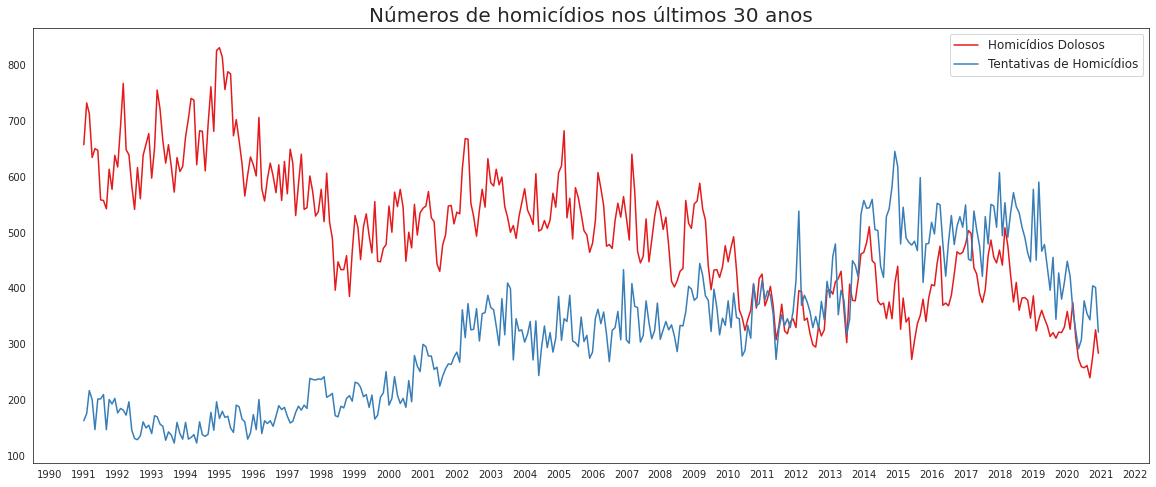

In [23]:
#plot de gráfico de linhas para homicídios dolosos e tentativas de homicídios
fig, ax = plt.subplots(figsize=(20, 8))
ax.set_title('Números de homicídios nos últimos 30 anos', size=20)
ax = sns.lineplot(data=df_1991[['hom_doloso', 'tentat_hom']], linewidth=1.5, dashes=False)
ax.get_xaxis().set_major_locator(mdates.YearLocator(1))
ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%Y"))
plt.legend(labels=['Homicídios Dolosos', 'Tentativas de Homicídios'], fontsize=12)
plt.show()

In [24]:
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

# Criando um novo dataset que contem uma média dos valores mensais de 2015 à 2019
df_2015_media_meses = pd.DataFrame([df_2015[df_2015.index.month == i+1].sum()/5 for i in range(12)], index=meses)
df_2015_media_meses

,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_transeunte,roubo_celular,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
Jan,435.6,2.4,18.4,456.4,106.4,562.8,573.8,6152.4,433.8,163.2,2507.0,6906.8,1570.4,948.4,9425.6,3901.8,775.4,529.0,106.6,2.4,5.0,4.0,77.0,13.4,1948.6,16788.8,1428.8,2534.4,730.6,1414.6,116.4,7667.2,13892.0,0.2,123.2,7.8,2776.0,2051.8,795.6,1106.8,187.4,2864.6,2881.0,750.6,1215.6,130.0,5492.4,490.0,44.6,2.2,3.0,0.2,65655.8,3.0
Fev,399.4,5.6,17.4,422.4,92.8,515.2,474.4,5229.0,377.0,145.8,2103.4,6140.4,1419.6,833.2,8393.2,3636.4,593.4,476.2,94.0,2.2,3.2,6.4,67.2,7.2,1887.4,15166.8,1320.6,2780.2,601.0,1475.2,96.2,6743.0,13016.2,0.0,108.4,9.4,2198.8,1874.0,721.0,1006.2,182.4,2445.4,2771.6,672.4,1270.8,122.2,4495.2,380.4,40.6,2.8,1.6,0.0,58284.8,3.0
Mar,435.4,4.0,18.4,457.8,95.8,553.6,537.8,5684.6,432.2,152.2,2478.0,7016.2,1819.6,1143.6,9979.4,4077.6,704.2,574.0,102.2,2.2,5.8,8.4,84.4,13.4,2349.2,17900.8,1394.2,2350.0,751.2,1501.4,136.6,7957.6,14091.0,0.6,161.4,6.8,2838.2,2038.4,762.4,1124.8,187.4,2732.2,3132.0,807.2,1512.6,134.2,5369.2,455.8,41.8,4.6,2.8,0.0,67202.0,3.0
Abr,417.2,1.8,16.6,435.6,88.4,524.0,506.8,5718.2,424.4,162.8,2677.0,7099.0,1878.2,1212.0,10189.2,3850.2,759.8,584.0,109.8,2.2,4.4,9.0,78.0,12.6,2204.2,17803.4,1327.6,1951.0,741.2,1303.8,147.0,7314.8,12785.4,1.2,137.8,11.4,2825.6,1975.8,737.8,1080.2,195.2,2781.8,3048.2,718.4,1521.4,153.2,5237.6,422.2,29.8,1.4,2.8,0.2,65448.8,3.0
Mai,381.8,2.2,14.4,398.4,108.4,506.8,495.8,5296.4,412.2,159.0,2720.8,7579.4,1926.4,1282.2,10788.0,3667.2,799.0,587.6,99.2,1.4,5.0,6.2,90.4,9.8,2119.8,18173.6,1423.2,2093.2,819.4,1352.8,168.2,7639.8,13496.6,0.4,159.0,9.0,3219.0,2048.6,743.6,1147.8,194.4,2713.6,3072.6,677.6,1609.4,147.6,5075.6,423.6,33.0,4.2,2.6,0.4,67331.8,3.0
Jun,348.4,3.6,15.6,367.6,104.8,472.4,476.0,4994.8,401.0,156.2,2715.2,6953.4,1856.6,1149.0,9959.0,3448.8,720.0,501.6,108.2,2.0,4.2,7.2,76.0,12.0,2017.4,16856.4,1339.8,1950.2,764.0,1364.4,132.2,7047.8,12598.4,0.0,145.2,9.2,2946.6,1926.6,723.8,1063.8,182.4,2370.2,2903.2,656.6,1562.6,149.6,4831.0,428.4,33.6,2.0,1.4,0.6,63073.4,3.0
Jul,354.2,4.4,13.8,372.4,104.6,477.0,465.8,5272.2,402.6,155.8,2744.0,7073.8,1907.0,1163.6,10144.4,3439.2,714.4,550.0,93.4,1.4,3.0,7.8,76.0,17.6,1941.8,16989.0,1306.8,1966.0,755.6,1406.6,180.6,7312.0,12927.6,0.8,139.8,9.0,3193.0,2059.2,827.4,1078.4,190.2,2522.6,2873.2,655.4,1638.0,171.4,4976.8,437.2,33.8,3.4,2.6,0.2,65174.4,3.0
Ago,360.0,3.4,12.0,375.4,108.4,483.8,503.0,5256.0,430.4,162.0,2817.2,7077.0,1938.8,1204.6,10220.4,3413.4,669.6,557.6,105.2,1.2,1.6,6.2,79.8,12.6,1970.0,17037.6,1341.6,2044.8,796.0,1478.0,172.2,7749.8,13582.4,0.0,145.2,10.0,3320.6,2070.4,814.2,1108.4,189.0,2572.8,3008.6,670.2,1746.4,187.6,5025.4,417.6,35.8,3.8,2.6,0.2,66836.6,3.0
Set,385.2,3.6,11.6,400.4,102.8,503.2,481.6,5525.2,449.4,157.0,2725.8,6608.6,1892.8,1129.4,9630.8,3367.6,630.0,518.0,98.6,1.0,2.4,6.2,102.8,18.4,1845.8,16221.6,1302.8,1970.0,764.4,1601.8,187.0,7392.6,13218.6,0.4,146.0,5.4,2936.0,1981.6,798.2,1041.8,177.6,2340.4,2807.2,666.0,1608.2,159.0,5132.8,453.8,31.8,5.4,2.4,0.4,64083.4,3.0
Out,407.0,4.4,14.4,425.8,102.0,527.8,477.8,6042.6,463.6,168.2,2736.0,7028.8,1989.4,1198.2,10216.4,3643.4,747.8,520.4,102.6,1.2,4.8,6.8,79.8,17.4,1928.4,17269.0,1340.4,1901.6,784.2,1591.2,195.2,7480.2,13292.8,1.0,144.2,9.4,3267.8,1966.0,808.2,1021.4,173.

In [25]:
# Cria uma cópia de df_2020, desta vez indexado pelos meses
df_2020_meses = df_2020.copy()
df_2020_meses.index = meses

In [26]:
# Verificando quais os casos são considerados como 'letalidade violenta'
dicionario.loc['letalidade_violenta'].Observação

'Homicídio doloso + Lesão corporal seguida de morte + Latrocínio + Morte por intervenção de agente do Estado'

Devido a pandemia do covid-19 que chegou no Brasil em 2020, iniciando-se um primeiro isolamento social em março, há a necessidade de comparar os casos deste ano com os dos anos seguintes. Para isso, podemos comparar os valores mensais de 2020 com as médias mensais dos anos de 2015 à 2019.

Podemos notar que houve diminuição significativa nos  números de homicídios dolosos, que como já haviamos notado com o gráfico anterior, estava em diminuição alcançando os menores valores em 2020. 

Ao verificar o gráfico com relação à mortes por intervenção de agentes do estado, podemos notar uma grande diferença com relação aos anos anteriores. Estes se mantiveram praticamente constantes ao longo dos meses, enquanto que em 2020 houve uma queda em março com pico anual em abril, tendo uma grande queda entre os meses de junho e setembro, ficando abaixo da metade dos números medios dos anos anteriores.


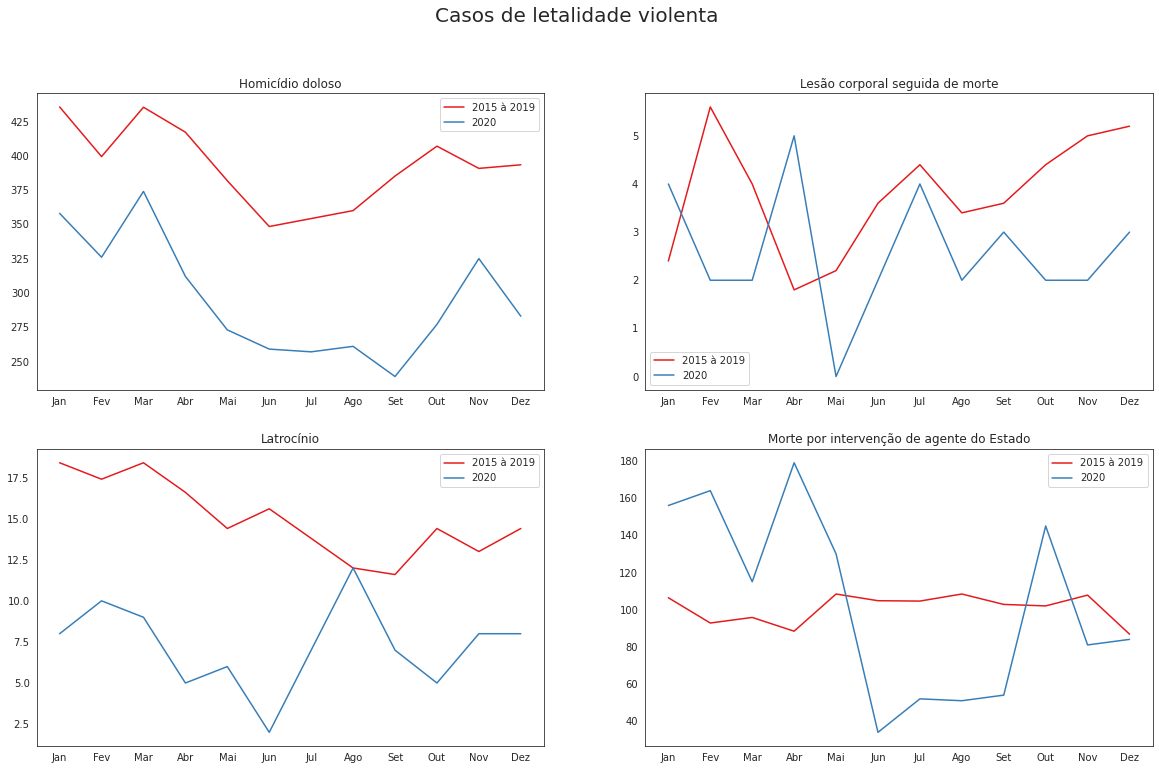

In [27]:
#Fazer 4 gráficos de linha, um para cada um dos tipos de letalidade violenta
fig, ax = plt.subplots(2,2,figsize=(20, 12))
fig.suptitle('Casos de letalidade violenta', size=20)
sns.lineplot(ax=ax[0,0],
             data=pd.concat([df_2015_media_meses['hom_doloso'],df_2020_meses['hom_doloso']],
                            axis=1,
                            keys=['2015 à 2019', '2020']), 
             linewidth=1.5,
             dashes=False)
ax[0,0].set_title('Homicídio doloso')

sns.lineplot(ax=ax[0,1],
             data=pd.concat([df_2015_media_meses['lesao_corp_morte'], df_2020_meses['lesao_corp_morte']],
                            axis=1,
                            keys=['2015 à 2019', '2020']),
             linewidth=1.5, 
             dashes=False)
ax[0,1].set_title('Lesão corporal seguida de morte')

sns.lineplot(ax=ax[1,0],
             data=pd.concat([df_2015_media_meses['latrocinio'], df_2020_meses['latrocinio']], 
                            axis=1,
                            keys=['2015 à 2019', '2020']),
              linewidth=1.5,
              dashes=False)
ax[1,0].set_title('Latrocínio')

sns.lineplot(ax=ax[1,1],
             data=pd.concat([df_2015_media_meses['hom_por_interv_policial'], df_2020_meses['hom_por_interv_policial']],
                            axis=1,
                            keys=['2015 à 2019', '2020']), 
             linewidth=1.5,
             dashes=False)
ax[1,1].set_title('Morte por intervenção de agente do Estado')

plt.show()

### Roubos e furtos

Nesta seção trataremos dos números de roubos e furtos. Em um primeiro momento, podemos verificar estes números no caso de roubos e furtos de veículos, fazendo comparativo com a taxa de recuperação.

Note que até o ano de 1999 os casos de furtos e roubos de veículos se mantiveram praticamente iguais. Outro ponto que podemos observar é que apesar dos casos de furtos terem diminuído ligeiramente a partir do ano 2011, houve uma explosão de casos de roubos e furtor até um pico entre 2017 e 2019, aparentemente de maneira proporcional, seguido de uma drástica queda.

In [28]:
# Médias de casos de roubo, furto e recuperação de veículos
roubo_veiculo = df_1991.roubo_veiculo
furto_veiculos = df_1991.furto_veiculos
recuperacao_veiculos = df_1991.recuperacao_veiculos

print(f'Média de roubos de veículos: {roubo_veiculo.mean()}')
print(f'Média de furto de veículos: {furto_veiculos.mean()}')
print(f'Média de recuperação de veículos: {recuperacao_veiculos.mean()}')

Média de roubos de veículos: 2443.0944444444444
Média de furto de veículos: 1649.3472222222222
Média de recuperação de veículos: 1758.5305555555556


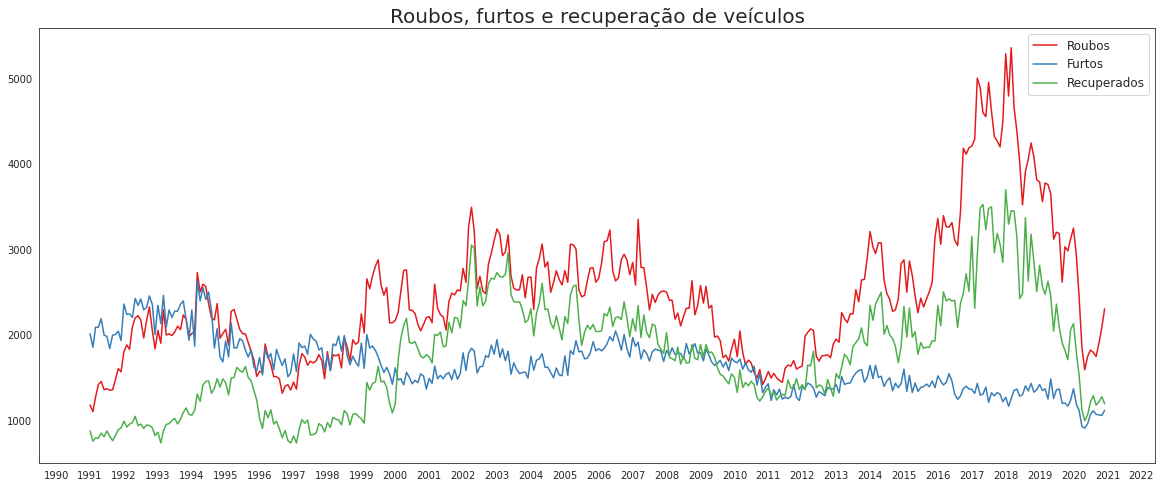

In [29]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.set_title('Roubos, furtos e recuperação de veículos', size=20)
ax = sns.lineplot(data=df_1991[['roubo_veiculo', 'furto_veiculos', 'recuperacao_veiculos']], linewidth=1.5, dashes=False)
ax.get_xaxis().set_major_locator(mdates.YearLocator(1))
ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%Y"))
plt.legend(labels=['Roubos', 'Furtos', 'Recuperados'], fontsize=12)
plt.show()

In [30]:
taxa_recuperação = recuperacao_veiculos / (roubo_veiculo + furto_veiculos)

Como podemos ver no gráfico abaixo, se observarmos a taxa de recuperação de veículos com relação a roubos e furtos por mes, vemos que na maioria dos meses esteve entre 40% e 55%.

(array([18., 34., 35., 13., 19., 65., 77., 65., 29.,  5.]),
 array([0.18166004, 0.22694543, 0.27223082, 0.31751621, 0.3628016 ,
        0.40808699, 0.45337238, 0.49865777, 0.54394316, 0.58922855,
        0.63451394]),
 <a list of 10 Patch objects>)

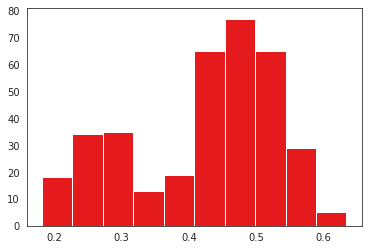

In [31]:
# histograma para a taxa de recuperação de veículos
plt.hist(taxa_recuperação)


Agora, assim como fizemos no caso de casos de alta letalidade, podemos comparar casos mensais de roubos em 2020 com a média dos anos de 2015 até 2019. Neste caso é clara a diminuição de casos de roubo de veículos, como já apontado anteriormente, além de roubos de rua e roubos à residências. 

Note que a partir de março houve uma queda nos números, e isto pode estar relacionado com o início da pandemia no Brasil. Porém em maio os casos voltaram a aumentar, ainda é claro distante dos valores médios dos anos anteriores.

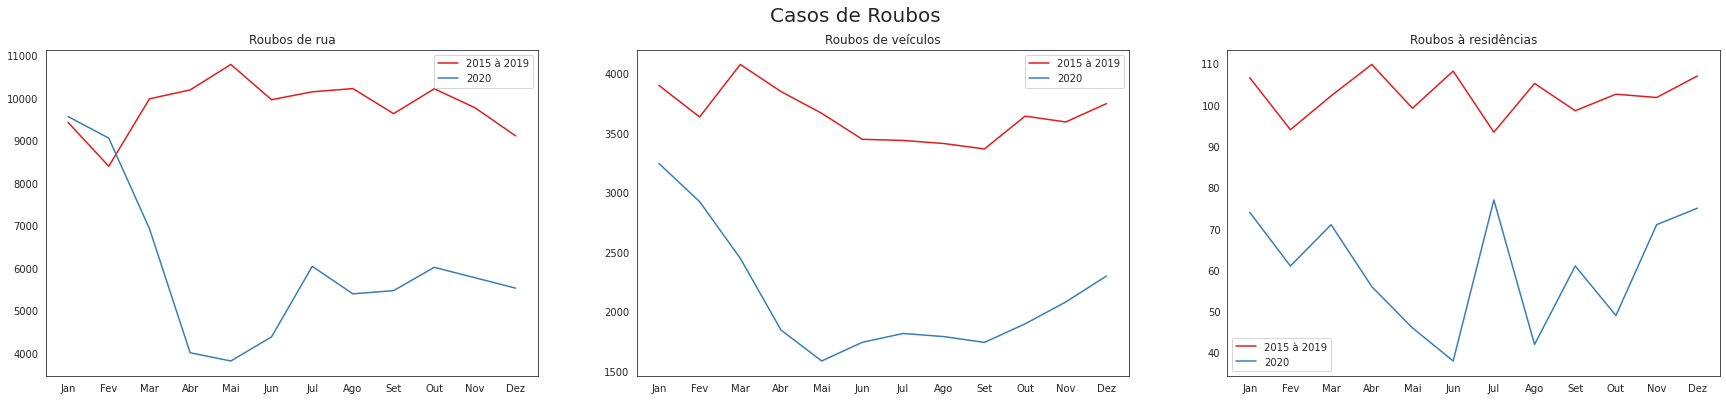

In [32]:
# gráficos comparando as médias de roubos nos anos de 2015 à 2019 e os ocorridos em 2020
fig, ax = plt.subplots(1,3,figsize=(30, 6))
fig.suptitle('Casos de Roubos', size=20)
sns.lineplot(ax=ax[0],
             data=pd.concat([df_2015_media_meses['roubo_rua'],df_2020_meses['roubo_rua']],
                            axis=1,
                            keys=['2015 à 2019', '2020']), 
             linewidth=1.5,
             dashes=False)
ax[0].set_title('Roubos de rua')

sns.lineplot(ax=ax[1],
             data=pd.concat([df_2015_media_meses['roubo_veiculo'], df_2020_meses['roubo_veiculo']],
                            axis=1,
                            keys=['2015 à 2019', '2020']),
             linewidth=1.5, 
             dashes=False)
ax[1].set_title('Roubos de veículos')

sns.lineplot(ax=ax[2],
             data=pd.concat([df_2015_media_meses['roubo_residencia'], df_2020_meses['roubo_residencia']], 
                            axis=1,
                            keys=['2015 à 2019', '2020']),
              linewidth=1.5,
              dashes=False)
ax[2].set_title('Roubos à residências')



plt.show()

### Apreensão de drogas

Para terminar podemos verificar o número de casos de apreênsão de drogas ao longo dos anos. Notemos que em 1998 houve um pico de casos e ao longo dos anos 2001 até 2006 os valores se mantiveram próximos. 

Porém em 2008 se iniciou um aumento de casos chegando ao máximo em 2015, alcançando números próximos do dobro dos casos de 10 anos atrás, havendo apenas uma pequena diminuição nos p´roximo anos.

In [33]:
#criação de um dataframe para verificar número de casos por ano
anos = df_1991.index.year.unique()
df_anos = pd.DataFrame([df_1991[df_1991.index.year == 1991+i].sum() for i in range(30)])
df_anos['ano'] = anos

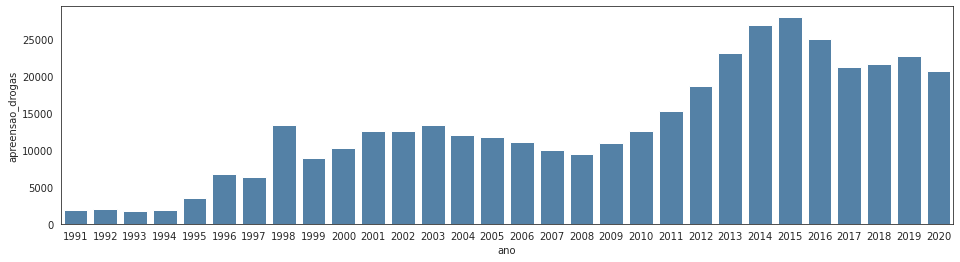

In [34]:
# gráfico de casos de apreensão de drogas por ano.
fig, ax = plt.subplots(figsize=(16,4))
sns.barplot(data = df_anos, x='ano', y='apreensao_drogas', color='steelblue')

## Conclusão

Com este projeto podemos verificar o aumento do número de casos de roubos e apreensão de drogas com relação aos números de 30 anos atrás, ao contrário do número de homicídios que estão, de maneira geral, em queda desde 1995. Notamos também que a pandemia que chegou em 2020 no Brasil pode ter influênciado a diminuição de casos, principalmente de roubos.